This will be my notebook for conducting Bayesian mixed-effects logistic regression for power.

I made separate notebooks for this bc it takes forever.

In [2]:
import arviz as az
import bambi as bmb
import argparse
from os.path import join
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from Bayesian_model_utils import run_model, plot_res, print_latex_table, plot_predictions

Once I am running models I can do model comparison using: 

https://arviz-devs.github.io/arviz/api/generated/arviz.compare.html
and 
https://arviz-devs.github.io/arviz/api/generated/arviz.plot_compare.html

as in: https://bambinos.github.io/bambi/main/notebooks/model_comparison.html?highlight=waic


In [41]:
# Model 1: Examine the effect of arousal and valence on recall: 

data_dir = "/home1/salman.qasim/Salman_Project/FR_Emotion_Lukas/EmotionGrids/Results/scratch"

behav_df = pd.read_csv(f'{data_dir}/encoding_df')

behav_df = behav_df[behav_df.Category!='Object']

behav_df = behav_df[['recall', 'Valence_mean', 'Arousal_mean', 'subj', 'Category']]

behav_df.Valence_mean = behav_df.Valence_mean - behav_df.Valence_mean.mean()

cat_type = CategoricalDtype(categories=['Animal', 'Person', 'Scene'], ordered=True)
behav_df.Category = behav_df.Category.astype(cat_type)


# Specify the model
y = 'recall'
X = ['Valence_mean', 'Arousal_mean', 'Category'] 
Intx = ['Valence_mean:Category', 
        'Arousal_mean:Category',
        'Valence_mean:Arousal_mean']

label = (f"{y}" + "_{}"*len(X)).format(*X)

#             'power:hemi:region:arousal',
#             'power:hemi:region:CV'
rand_effect = ['subj']
categorical = ['Category']

# Drop nan data
behav_df = behav_df.dropna(subset=X)

label = (f"{y}" + "_{}"*len(X)).format(*X) + '_Lukas'

# Run the model 
run_model(behav_df, y, X, Intx, rand_effect, 
          chains=4, cores=4, tune=1000, draws=1000, categorical_baseline=False,
          label = label, rand_slopes=False)

Modeling the probability that recall==1
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 23900
Interrupted at 23,899 [47%]: Average Loss = 3,022.2
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1|subj_offset, 1|subj_sigma, Valence_mean:Arousal_mean, Arousal_mean:Category, Valence_mean:Category, Category, Arousal_mean, Valence_mean]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 510 seconds.
The number of effective samples is smaller than 25% for some parameters.
/home1/salman.qasim/Salman_Python_Scripts/SQ_Projects/Bayesian_model_utils.py:142: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.reset_index().to_latex(index=False,


\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\toprule
                        index &   mean &    sd &  hdi\_2.5\% &  hdi\_97.5\% \\ \hline
\midrule
                 Valence\_mean &  0.745 & 0.471 &    -0.159 &      1.666 \\ \hline
Valence\_mean:Category[Person] & -0.378 & 0.153 &    -0.683 &     -0.089 \\ \hline
 Valence\_mean:Category[Scene] & -0.288 & 0.166 &    -0.605 &      0.047 \\ \hline
    Valence\_mean:Arousal\_mean & -0.105 & 0.112 &    -0.317 &      0.110 \\ \hline
                 Arousal\_mean &  0.433 & 0.203 &     0.056 &      0.850 \\ \hline
Arousal\_mean:Category[Person] & -0.330 & 0.225 &    -0.768 &      0.102 \\ \hline
 Arousal\_mean:Category[Scene] & -0.215 & 0.229 &    -0.658 &      0.230 \\ \hline
    Valence\_mean:Arousal\_mean & -0.105 & 0.112 &    -0.317 &      0.110 \\ \hline
             Category[Animal] & -1.820 & 0.927 &    -3.677 &     -0.041 \\ \hline
             Category[Person] & -0.812 & 0.572 &    -1.989 &      0.221 \\ \hline
              Cat

In [47]:
# Model 1: Examine the effect of arousal and valence on recall: 

data_dir = "/home1/salman.qasim/Salman_Project/FR_Emotion_Lukas/EmotionGrids/Results/scratch"

behav_df = pd.read_csv(f'{data_dir}/encoding_df')

# behav_df = behav_df[behav_df.Category!='Object']

behav_df = behav_df[['recall', 'Valence_mean', 'Arousal_mean', 'subj']]

behav_df.Valence_mean = behav_df.Valence_mean - behav_df.Valence_mean.mean()


# Specify the model
y = 'recall'
X = ['Valence_mean', 'Arousal_mean'] 
Intx = ['Valence_mean:Arousal_mean']

label = (f"{y}" + "_{}"*len(X)).format(*X)

#             'power:hemi:region:arousal',
#             'power:hemi:region:CV'
rand_effect = ['subj']
# categorical = ['Category']

# Drop nan data
behav_df = behav_df.dropna(subset=X)

label = (f"{y}" + "_{}"*len(X)).format(*X) + '_Lukas'

# Run the model 
run_model(df=behav_df, y=y, X=X, , Intx=Intx, rand_effect=rand_effect, 
          chains=4, cores=4, tune=1000, draws=1000, 
          label = label, rand_slopes=False)

Modeling the probability that recall==1
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 19300
Interrupted at 19,299 [38%]: Average Loss = 3,281.8
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1|subj_offset, 1|subj_sigma, Valence_mean:Arousal_mean, Arousal_mean, Valence_mean, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 211 seconds.
The number of effective samples is smaller than 25% for some parameters.
/home1/salman.qasim/Salman_Python_Scripts/SQ_Projects/Bayesian_model_utils.py:142: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.reset_index().to_latex(index=False,


\begin{tabular}{|c|c|c|c|}
\toprule
                    index &   mean &    sd &  hdi\_2.5\% &  hdi\_97.5\% \\ \hline
\midrule
             Valence\_mean &  0.320 & 0.342 &    -0.308 &      1.034 \\ \hline
Valence\_mean:Arousal\_mean & -0.072 & 0.091 &    -0.249 &      0.104 \\ \hline
             Arousal\_mean &  0.249 & 0.059 &     0.138 &      0.364 \\ \hline
Valence\_mean:Arousal\_mean & -0.072 & 0.091 &    -0.249 &      0.104 \\ \hline
\bottomrule
\end{tabular}



In [52]:
# # Model 1: Examine the effect of arousal and valence on recall: 

# data_dir = "/home1/salman.qasim/Salman_Project/FR_Emotion_Lukas/EmotionGrids/Results/scratch"

# behav_df = pd.read_csv(f'{data_dir}/encoding_df')

# # behav_df = behav_df[behav_df.Category!='Object']

# behav_df = behav_df[['recall', 'Valence_mean', 'Arousal_mean', 'subj']]

# behav_df.Valence_mean = behav_df.Valence_mean - behav_df.Valence_mean.mean()
# behav_df['Valence_squared'] = behav_df.Valence_mean**2


# # Specify the model
# y = 'recall'
# X = ['Valence_squared', 'Arousal_mean'] 
# Intx = ['Valence_squared:Arousal_mean']

# label = (f"{y}" + "_{}"*len(X)).format(*X)

# #             'power:hemi:region:arousal',
# #             'power:hemi:region:CV'
# rand_effect = ['subj']
# # categorical = ['Category']

# # Drop nan data
# behav_df = behav_df.dropna(subset=X)

# label = (f"{y}" + "_{}"*len(X)).format(*X) + '_Lukas'

# # Run the model 
# run_model(df=behav_df, y=y, X=X, Intx=Intx, rand_effect=rand_effect, 
#           chains=4, cores=4, tune=1000, draws=1000, 
#           label = label, rand_slopes=False)

In [53]:
# # Model 1: Examine the effect of arousal and valence on recall: 

# data_dir = "/home1/salman.qasim/Salman_Project/FR_Emotion_Lukas/EmotionGrids/Results/scratch"

# behav_df = pd.read_csv(f'{data_dir}/encoding_df')

# behav_df = behav_df[behav_df.Category!='Object']

# behav_df = behav_df[['recall', 'Valence_mean', 'Arousal_mean', 'subj', 'Category']]

# behav_df.Valence_mean = behav_df.Valence_mean - behav_df.Valence_mean.mean()

# cat_type = CategoricalDtype(categories=['Animal', 'Person', 'Scene'], ordered=True)
# behav_df.Category = behav_df.Category.astype(cat_type)


# # Specify the model
# y = 'recall'
# X = ['Category'] 
# # Intx = ['Valence_mean:Arousal_mean']

# label = (f"{y}" + "_{}"*len(X)).format(*X)

# #             'power:hemi:region:arousal',
# #             'power:hemi:region:CV'
# rand_effect = ['subj']
# categorical = ['Category']

# # Drop nan data
# behav_df = behav_df.dropna(subset=X)

# label = (f"{y}" + "_{}"*len(X)).format(*X) + '_Lukas'

# # Run the model 
# run_model(df=behav_df, y=y, X=X, rand_effect=rand_effect, 
#           chains=4, cores=4, tune=1000, draws=1000, 
#           label = label, rand_slopes=False, Intx=None)

In [50]:
# Model comparison: use PSI-LOO to determine which model to use. 

# Load each model
valence = az.from_netcdf('/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels/recall_Valence_mean_Arousal_mean_Lukas_model')
valence_squared  = az.from_netcdf(f'/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels/recall_Valence_squared_Arousal_mean_Lukas_model')

models = {"valence": valence, 
          "valence_squared": valence_squared}

df_compare = az.compare(models, ic='loo')
plot_df = df_compare.reset_index().rename(columns={'index':'model'})[['model', 'loo']]

c_string = '|c'*plot_df.shape[1] + '|'
print(plot_df.to_latex(index=False, 
                                        column_format=c_string).replace("\\\n", "\\ \hline\n"))  


\begin{tabular}{|c|c|}
\toprule
          model &          loo \\ \hline
\midrule
        valence & -2087.768199 \\ \hline
valence\_squared & -2087.788514 \\ \hline
\bottomrule
\end{tabular}



/tmp/2832674.1.jupyter.q/ipykernel_111505/1591761843.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(plot_df.to_latex(index=False,


<AxesSubplot:xlabel='Log'>

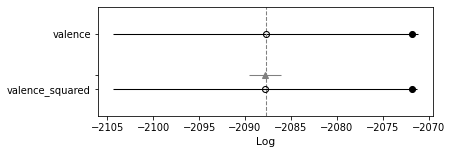

In [51]:
az.plot_compare(df_compare, insample_dev=True)